GROSSO PROBLEMA: NON VI E' ALCUN ISTITUTO IN GERMANIA! IL FILE bokeh_countries_periods_DEFINITIVO (e la sua viz con bokeh) E' SBAGLIATO!!! QUINDI, AVEVO OPTATO DI SOSTITUIRE QUEL BARPLOT CON QUESTI DUE CHE VEDETE SOTTO, AIUTATEMI A CREARE MATRICE E FILE BOKEH!!!!! IO NON CI RIESCO PERCHE' MI DA SEMPRE INDEX OUT OF RANGE!

In [56]:
#CORRELARE GLI STORICI COL PERIODO CHE HANNO STUDIATO

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Historian ?Period
    WHERE {
        ?collect wdt:P170 ?artHistorian ;
                    rdfs:label ?Collection ;
                    art:hasSubjectPeriod ?perio .
        ?perio rdfs:label ?Period .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Historian ?Period
    """)

with open('historian_periods.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Historian', 'Period'])
    for row in query_result:
        csv_writer.writerow([row.Historian.strip(), row.Period.strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('historian_periods.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

,Historian,Period
0,Ulrich Middeldorf,Cold War
1,Ulrich Middeldorf,Cold War
2,Kornél Fabriczy,Renaissance
3,Kornél Fabriczy,Renaissance
4,Kornél Fabriczy,Renaissance
5,Kornél Fabriczy,Renaissance
6,Kornél Fabriczy,Renaissance
7,Kornél Fabriczy,Renaissance
8,Kornél Fabriczy,Renaissance
9,Kornél Fabriczy,Renaissance


In [57]:
import csv
import pandas as pd


with open("historian_periods.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=',', encoding = "latin-1")
print(df.head(20))

                 Historian       Period
0        Ulrich Middeldorf     Cold War
1        Ulrich Middeldorf     Cold War
2          Kornél Fabriczy  Renaissance
3          Kornél Fabriczy  Renaissance
4          Kornél Fabriczy  Renaissance
5          Kornél Fabriczy  Renaissance
6          Kornél Fabriczy  Renaissance
7          Kornél Fabriczy  Renaissance
8          Kornél Fabriczy  Renaissance
9          Kornél Fabriczy  Renaissance
10         Kornél Fabriczy  Renaissance
11         Kornél Fabriczy  Renaissance
12         Kornél Fabriczy  Renaissance
13  Otto Lehmann-Brockhaus  Middle Ages
14  Otto Lehmann-Brockhaus  Middle Ages
15  Otto Lehmann-Brockhaus  Middle Ages
16  Otto Lehmann-Brockhaus  Middle Ages
17  Otto Lehmann-Brockhaus  Middle Ages
18  Otto Lehmann-Brockhaus  Middle Ages
19  Otto Lehmann-Brockhaus  Middle Ages


In [58]:

import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

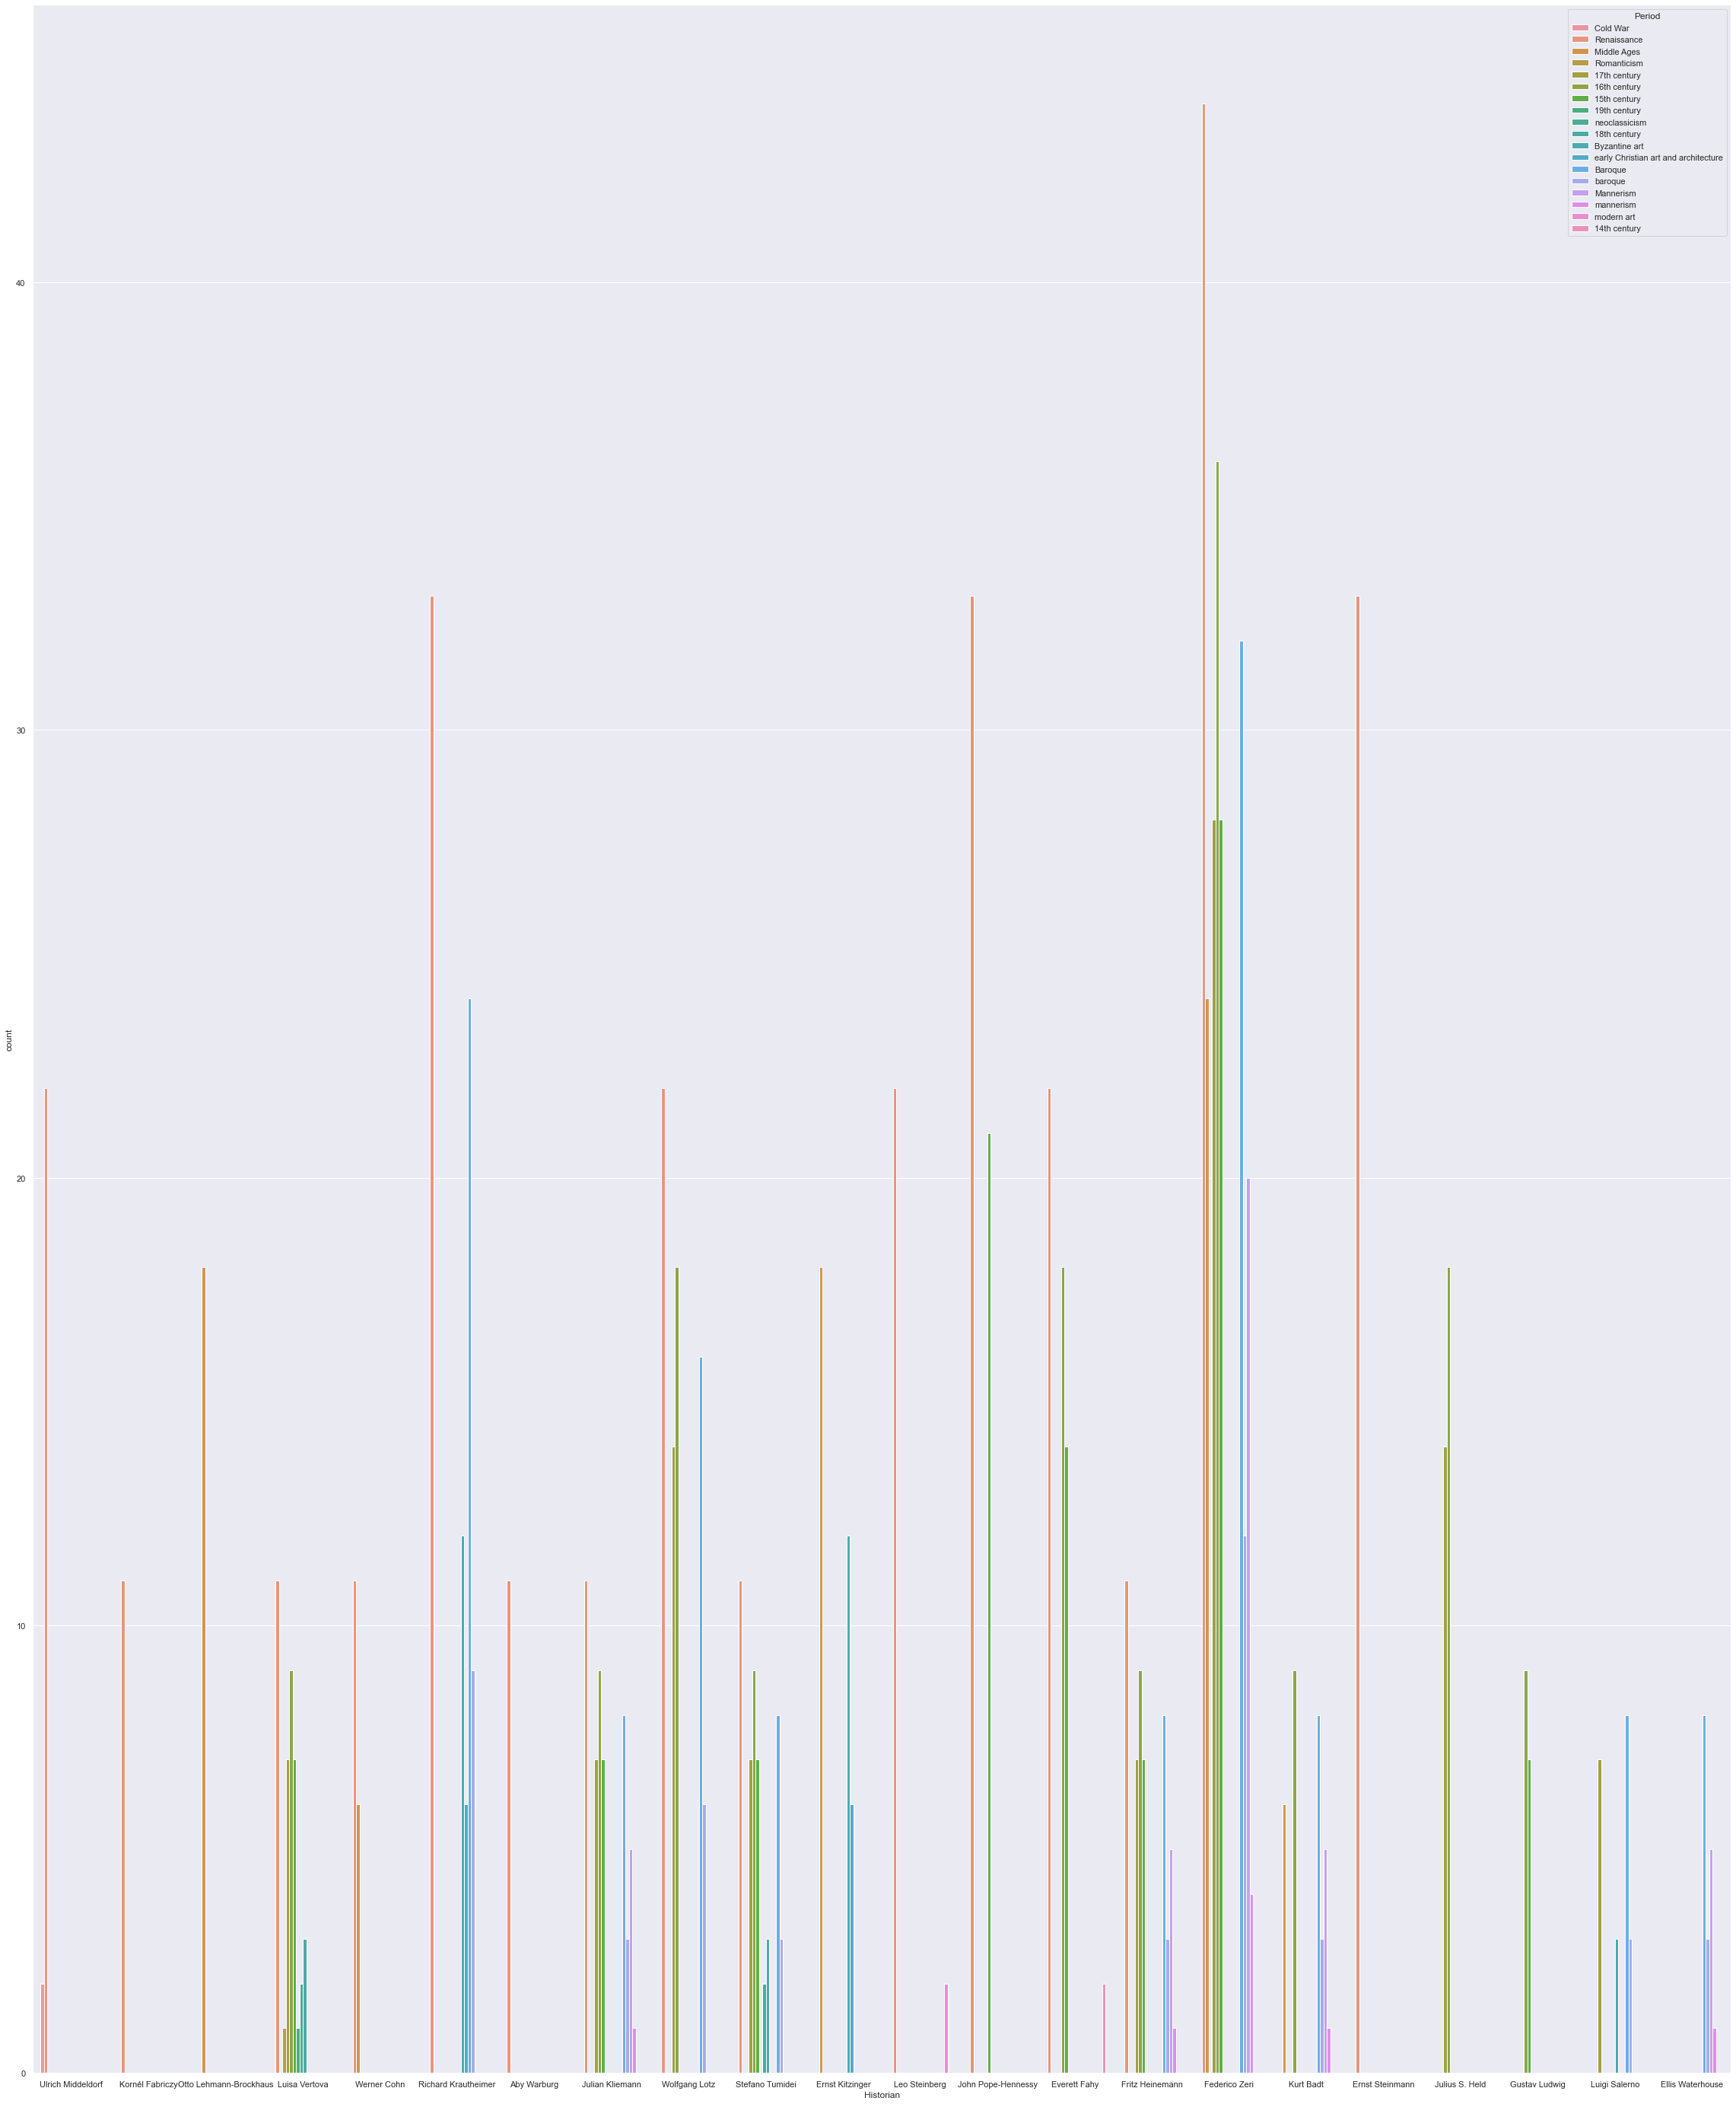

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 50)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Historian", hue="Period", data=df)

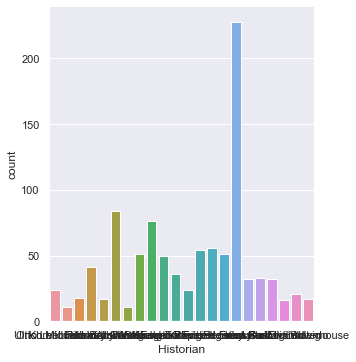

In [60]:

#plot the counting 
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

ax = sns.catplot(x="Historian", kind= "count", data= df)

In [31]:
#SERVE LA MATRICE E LA VIZ BOKEH
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open("historian_periods.csv") as csv_file:
    historian = [] 
    period = []
    rows = csv.reader(csv_file, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[1] not in historian:
            historian.append(row[1]) # create the list of unique periods
        if row[0] not in period:
            period.append(row[0]) # create the list of unique periods
    print(historian)
    print(period)
    period.sort()
    periods_historians_zeros_matrix = np.array(np.zeros(( len(period), len(historian) ))) # rows, columns
    
    for i, periods in enumerate(period): # loop over periods and their index position  
        for j, hist in enumerate(historian):
            with open('historian_periods.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[0] == period and row[1] == historians:
                        periods_historians_zeros_matrix[j][i] = int(periods_historians_zeros_matrix[j][i])+1
    
    periods_historians_zeros_matrix
    
# put everything together
data["Period"] = period
for i, hist in enumerate(historian):
    data[hist] = list(periods_historians_zeros_matrix[i])
print(data)

IndexError: list index out of range

In [37]:
#CORRELARE LE COLLEZIONI AI KEEPER

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Keeper
    WHERE {
         ?keep a wd:Q31855 ; 
                 rdfs:label ?Keeper .
        ?collect wdt:P170 ?artHistorian .
        ?collect rdfs:label ?Collection .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Collection ?Keeper
    """)

with open('collection_keeper.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Keeper'])
    for Collection, Keeper in query_result:
        csv_writer.writerow([Collection.strip(), Keeper.strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('collection_keeper.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

,Collection,Keeper
0,Fototeca Stefano Tumidei,Getty Research Institute
1,Nachlass Werner Cohn,Getty Research Institute
2,"Ernst Kitzinger papers, 1931-1995",Getty Research Institute
3,Battisti Eugenio (complex of fonds),Getty Research Institute
4,Archivio Luisa Vertova,Getty Research Institute
5,Luigi Salerno research papers,Getty Research Institute
6,Nachlass Ulrich Middeldorf,Getty Research Institute
7,Nachlass Otto Lehmann-Brockhaus,Getty Research Institute
8,John Pope-Hennessy papers,Getty Research Institute
9,Nachlass Kurt Badt,Getty Research Institute


In [39]:
import csv
import pandas as pd


with open("collection_keeper.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=',', encoding = "latin-1")
print(df.head(20))

                             Collection                    Keeper
0              Fototeca Stefano Tumidei  Getty Research Institute
1                  Nachlass Werner Cohn  Getty Research Institute
2     Ernst Kitzinger papers, 1931-1995  Getty Research Institute
3   Battisti Eugenio (complex of fonds)  Getty Research Institute
4                Archivio Luisa Vertova  Getty Research Institute
5         Luigi Salerno research papers  Getty Research Institute
6            Nachlass Ulrich Middeldorf  Getty Research Institute
7       Nachlass Otto Lehmann-Brockhaus  Getty Research Institute
8             John Pope-Hennessy papers  Getty Research Institute
9                    Nachlass Kurt Badt  Getty Research Institute
10    Venturi Adolfo (complex of fonds)  Getty Research Institute
11                        Fototeca Zeri  Getty Research Institute
12             Nachlass Ernst Steinmann  Getty Research Institute
13        Leo Steinberg research papers  Getty Research Institute
14        

In [40]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Collection', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Keeper', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

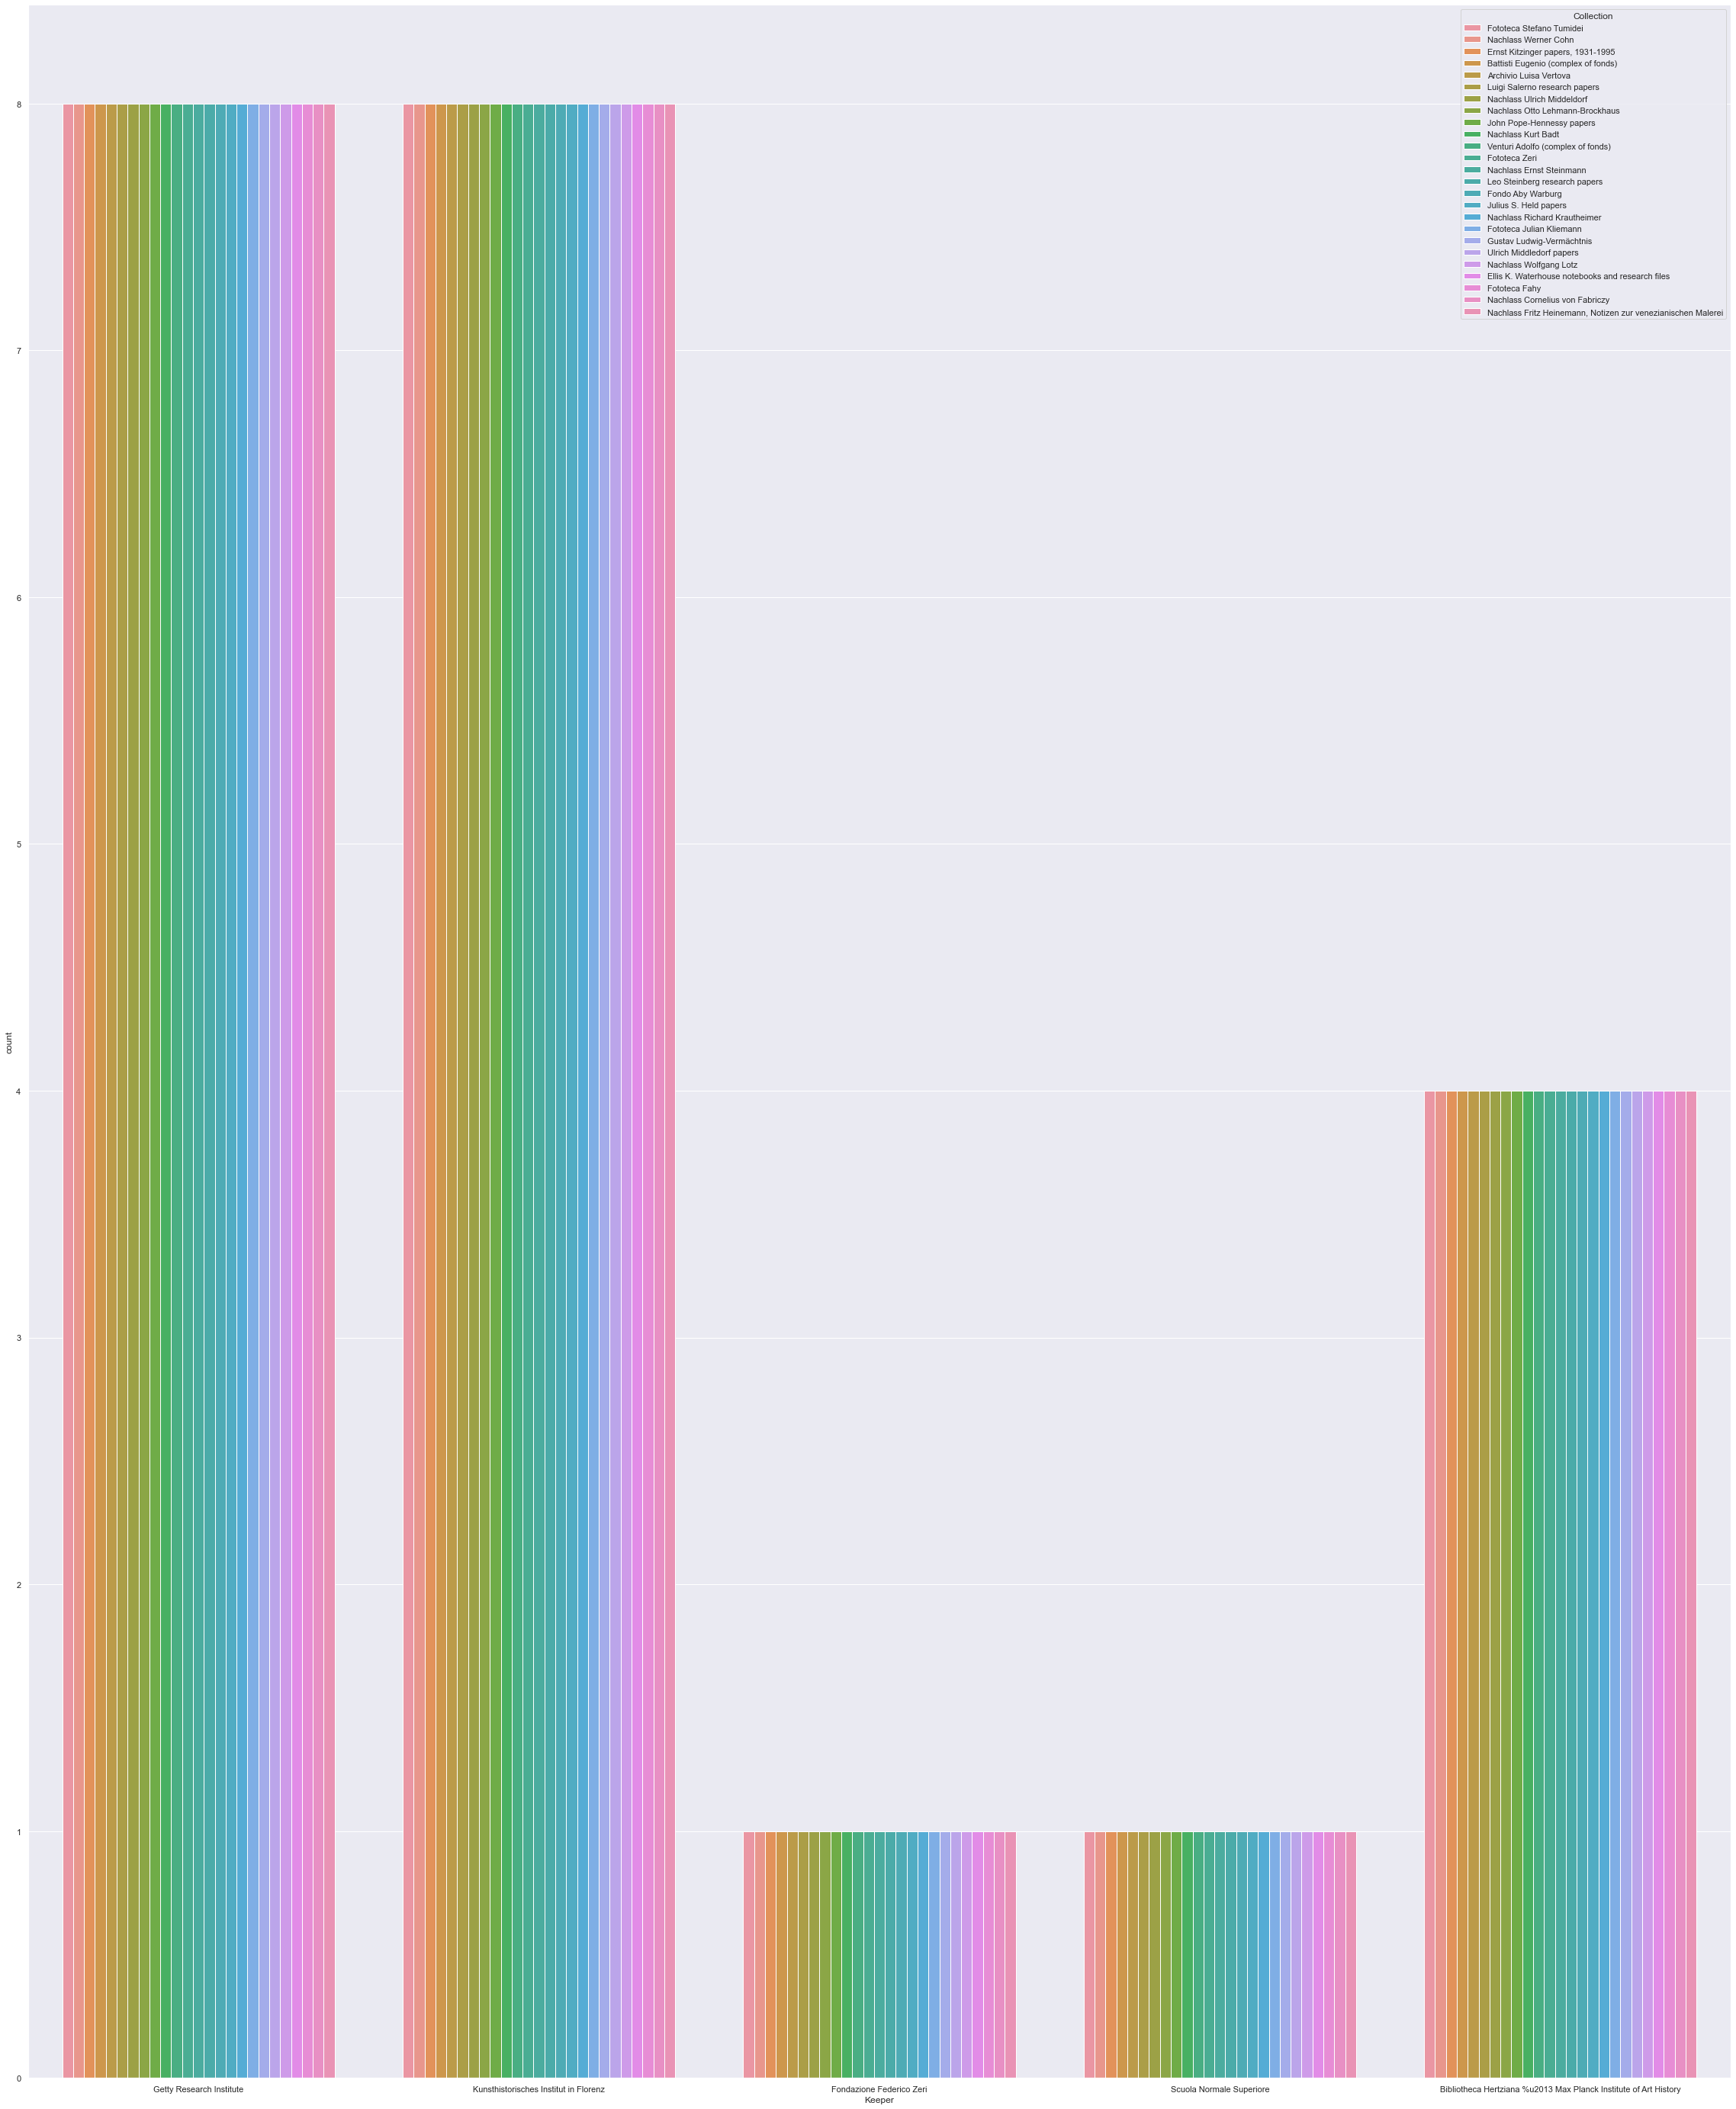

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 50)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Keeper", hue="Collection", data=df)

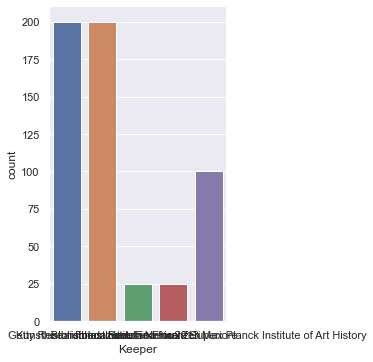

In [54]:

#plot the counting 
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

ax = sns.catplot(x="Keeper", kind= "count", data= df)


In [ ]:
#SERVE ANCHE PER QUESTO MATRICE E VIZ CON BOKEH 